## WhatsApp Chat Analysis

#### 1.Import Regular Expression deal with text format 


In [1]:

import re
import pandas as pd

In [2]:
f = open('WhatsApp Chat with Sahir Jio.txt','r',encoding ='utf-8')

In [3]:
data = f.read()


In [4]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
#pattern for AM ANd PM format
#   '\d{1,2}\/\d{2,4}\/\d{2,4},\s\d{1,2}:\d{1,2}\s\w{1,2}\s-\s'

In [5]:
message = re.split(pattern,data)[1:]


In [6]:
dates = re.findall(pattern,data)


In [7]:
df = pd.DataFrame({'admin_message':message, 'message_date':dates})  
df['message_date']= pd.to_datetime(df['message_date'],format= '%d/%m/%Y, %H:%M - ')
df.rename(columns = {'message_date': 'Date'}, inplace = True)
df.head(4)

,admin_message,Date
0,Messages and calls are end-to-end encrypted. N...,2022-03-01 17:40:00
1,Sahir Jio: Free hona to call krna\n,2022-03-01 17:40:00
2,😈😈: Insha allah\n,2022-03-01 17:41:00
3,😈😈: Bike hai???\n,2022-03-01 17:42:00


In [8]:
#separate user and message
users = []
messages = []
for message in df['admin_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]: #user name
        users.append(entry[1])
        messages.append(entry[2])
        
    else:
        users.append('Notification')
        messages.append(entry[0])
        
df['user'] =users
df['message'] = messages


df.head(2)




,admin_message,Date,user,message
0,Messages and calls are end-to-end encrypted. N...,2022-03-01 17:40:00,Notification,Messages and calls are end-to-end encrypted. N...
1,Sahir Jio: Free hona to call krna\n,2022-03-01 17:40:00,Sahir Jio,Free hona to call krna\n


In [9]:

# Removing Extra Columnns
df.drop(columns=['admin_message'], inplace = True)

In [10]:
df.head(3)

,Date,user,message
0,2022-03-01 17:40:00,Notification,Messages and calls are end-to-end encrypted. N...
1,2022-03-01 17:40:00,Sahir Jio,Free hona to call krna\n
2,2022-03-01 17:41:00,😈😈,Insha allah\n


In [11]:
#Changing Date columns to be more specific
df['Year']   =  df['Date'].dt.year
df['Month']  =  df['Date'].dt.month_name()
df['day'] =     df['Date'].dt.day
df['Hour'] =    df['Date'].dt.hour
df['Minute']=   df['Date'].dt.minute



In [12]:
df.head(3)

,Date,user,message,Year,Month,day,Hour,Minute
0,2022-03-01 17:40:00,Notification,Messages and calls are end-to-end encrypted. N...,2022,March,1,17,40
1,2022-03-01 17:40:00,Sahir Jio,Free hona to call krna\n,2022,March,1,17,40
2,2022-03-01 17:41:00,😈😈,Insha allah\n,2022,March,1,17,41


In [13]:
df[df['message']== '<Media omitted>\n'].shape[0]

116

In [14]:
word = []
for message in df['message']:
    word.extend(message.split())

In [15]:
len(word)

4946

In [16]:
new = df[df['message'] == '<Media omitted>\n'].shape[0]
new

116

In [17]:
with open('WhatsApp Chat with Sahir Jio.txt') as file:
    for line in file:
        urls = re.findall('https?://(?:[-\w]|(?:%[\da-fA-F]{2}))+',line)
        print(urls)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['https://youtube']
[]
[]
['https://youtu']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['https://youtube']
[]
[]
[]
[]
[]
[]
[]
['https://youtu']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['https://youtu']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['https://youtu']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 4522: character maps to <undefined>

In [18]:
from urlextract import URLExtract 
extract = URLExtract()

In [19]:
links = []
for message in df["message"]:
    links.extend(extract.find_urls(message))
    
  
   

In [20]:
len(links)

23

In [21]:
x = df['user'].value_counts().head(2)

In [22]:
import matplotlib.pyplot as plt
name = x.index
count = x.values

<BarContainer object of 2 artists>

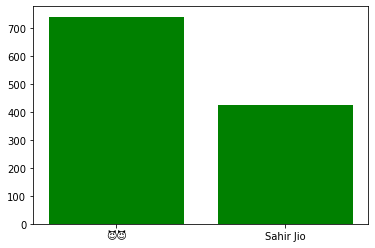

In [23]:
plt.bar(name,count,color= 'green')

In [24]:
# percentages of msg send
Percent =round(df['user'].value_counts().head(2)/df.shape[0]*100,2)
Percent

😈😈           63.42
Sahir Jio    36.50
Name: user, dtype: float64

In [26]:
chats_percentage= round(df['user'].value_counts().head(2)/df.shape[0]*100,2).reset_index().rename(columns={'index':'Name','user':'Percent'})
chats_percentage

,Name,Percent
0,😈😈,63.42
1,Sahir Jio,36.50


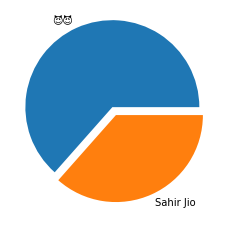

In [33]:
exp= [0.1,0]
plt.pie(chats_percentage['Percent'], labels= chats_percentage['Name'] ,explode= exp);

In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=800,height=800,min_font_size=10, background_color='white')
df_wc =wc.generate(df['message'].str.cat(sep= " "))
df_wc

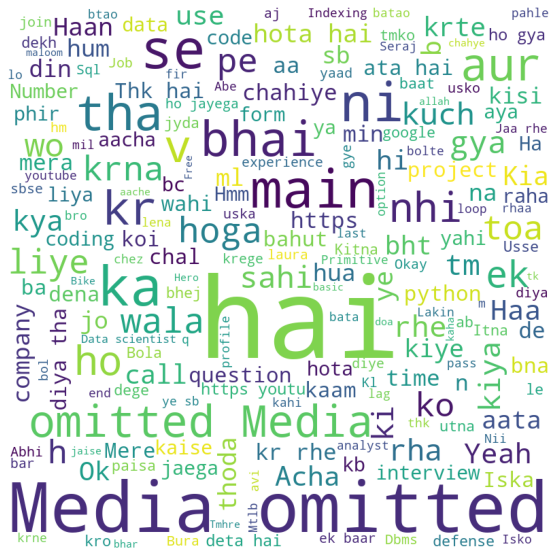

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(df_wc)
plt.axis('off');


In [36]:
words = []
for message in df['message']:
    words.extend(message.split())

In [37]:
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 'Free',
 'hona',
 'to',
 'call',
 'krna',
 'Insha',
 'allah',
 'Bike',
 'hai???',
 'Haa',
 'scooty',
 'hona',
 'chahye',
 'Tmhre',
 'pass',
 'scooty',
 'v',
 'hai',
 'Aaao',
 'idhar',
 'Mere',
 'pass',
 'nhi',
 'hai',
 'Wahaan',
 'Accha',
 'aate',
 'Okay',
 'Nikalne',
 'se',
 'pahle',
 'call',
 'kr',
 'lena',
 'Ok',
 'LIFO',
 'kaha',
 'kaha',
 'use',
 'hota',
 'hai',
 'Desi',
 'main',
 'btao',
 'Stack',
 'wala',
 'Computer',
 'me',
 'undo',
 'and',
 'redo',
 'jo',
 'krte',
 'ho',
 'wo',
 'stacks',
 'ka',
 'hi',
 'use',
 'kr',
 'ke',
 'hota',
 'hai',
 'Web',
 'browser',
 'jo',
 'tmhara',
 'history',
 'rkhta',
 'hai',
 'wo',
 'b',
 'stacks',
 'me,',
 'jo',
 'sbse',
 'last',
 'me',
 'website',
 'dekhte',
 'ho',
 'wo',
 'sbse',
 'phle',
 'aata',
 'hai',

In [38]:
from collections import Counter

In [39]:
Counter(words)

Counter({'Messages': 1,
         'and': 6,
         'calls': 1,
         'are': 1,
         'end-to-end': 1,
         'encrypted.': 1,
         'No': 3,
         'one': 2,
         'outside': 1,
         'of': 2,
         'this': 3,
         'chat,': 1,
         'not': 1,
         'even': 3,
         'WhatsApp,': 1,
         'can': 2,
         'read': 1,
         'or': 2,
         'listen': 1,
         'to': 40,
         'them.': 1,
         'Tap': 1,
         'learn': 2,
         'more.': 1,
         'Free': 3,
         'hona': 3,
         'call': 8,
         'krna': 25,
         'Insha': 2,
         'allah': 3,
         'Bike': 2,
         'hai???': 1,
         'Haa': 15,
         'scooty': 3,
         'chahye': 4,
         'Tmhre': 2,
         'pass': 5,
         'v': 45,
         'hai': 268,
         'Aaao': 2,
         'idhar': 1,
         'Mere': 5,
         'nhi': 33,
         'Wahaan': 1,
         'Accha': 2,
         'aate': 2,
         'Okay': 5,
         'Nikalne': 1,
      

In [40]:
counts =Counter(words).most_common(20)
counts

[('hai', 268),
 ('<Media', 116),
 ('omitted>', 116),
 ('ka', 65),
 ('se', 63),
 ('tha', 60),
 ('main', 58),
 ('ni', 57),
 ('kr', 53),
 ('k', 50),
 ('v', 45),
 ('ho', 42),
 ('me', 41),
 ('to', 40),
 ('bhai', 36),
 ('nhi', 33),
 ('rhe', 33),
 ('gya', 29),
 ('aur', 28),
 ('krna', 25)]

In [41]:
#convert into data frame
pd.DataFrame(counts)

,0,1
0,hai,268
1,<Media,116
2,omitted>,116
3,ka,65
4,se,63
5,tha,60
6,main,58
7,ni,57
8,kr,53
9,k,50


### Removing  notification , media omitted

In [43]:
temp = df['user'] != 'Notification'
temp

0       False
1        True
2        True
3        True
4        True
        ...  
1165     True
1166     True
1167     True
1168     True
1169     True
Name: user, Length: 1170, dtype: bool

In [44]:
temp = df[df['user'] != 'Notification']
temp= temp[temp['message'] != '<Media omitted>\n']

In [45]:
f = open('hinglish.txt','r')
stop_word = f.read()

In [46]:
print(stop_word)

a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
couldn
couldnt
couldn't
d
de
dede
dega
d

In [47]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_word:
            words.append(word)
  

In [48]:
print(words)

['free', 'call', 'insha', 'allah', 'bike', 'hai???', 'scooty', 'chahye', 'tmhre', 'pass', 'scooty', 'aaao', 'pass', 'aate', 'nikalne', 'pahle', 'call', 'lena', 'lifo', 'desi', 'btao', 'stack', 'computer', 'undo', 'redo', 'krte', 'stacks', 'web', 'browser', 'tmhara', 'history', 'rkhta', 'stacks', 'me,', 'sbse', 'website', 'dekhte', 'sbse', 'history', 'oooh', '...', 'fifo', 'bare', 'bhejo', 'link', 'https://youtube.com/playlist?list=plxczcowd7aihqu4hkl7-sityusicd93id', 'toa', 'basic', 'hero', 'https://youtu.be/s1gyw3h5j3q', 'tmhre', 'laakin', 'mile', 'toa', 'lena', 'baar.....', 'chez', 'ismain..', '2x', 'dekhna', '👌', 'btaya', 'tmko', 'maloom', 'tm', 'depression', 'financial', 'chez', 'btaya', 'dbms', 'pdf', 'bhejna', 'kaam', 'page', 'wala..', 'basic', 'baithna', 'https://youtube.com/playlist?list=plxczcowd7aifan6i8cuvibucdjgiokt2y', '26', 'tk', 'jaega', 'pdf', 'utna', 'baithana', 'hlw', 'hlw', 'sir', 'krte', 'https://youtu.be/7qqx1m5ht80', '😂', 'dbms', 'bacha', '2', 'joins', 'query', 'a

In [49]:
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,gya,29
1,toa,25
2,tm,18
3,sb,16
4,data,16
5,...,15
6,krte,14
7,kia,14
8,thk,14
9,call,12


In [50]:
df['month_num'] = df['Date'].dt.month

In [51]:
df.groupby(['Year','month_num']).count()

Date  user  message  Month  day  Hour  Minute
Year month_num                                               
2022 3           541   541      541    541  541   541     541
     4             3     3        3      3    3     3       3
     5           118   118      118    118  118   118     118
     6           151   151      151    151  151   151     151
     7            21    21       21     21   21    21      21
     8           176   176      176    176  176   176     176
     9            19    19       19     19   19    19      19
     10          141   141      141    141  141   141     141

In [52]:
Time_line =df.groupby(['Year','month_num','Month']).count()['message'].reset_index()
Time_line

,Year,month_num,Month,message
0,2022,3,March,541
1,2022,4,April,3
2,2022,5,May,118
3,2022,6,June,151
4,2022,7,July,21
5,2022,8,August,176
6,2022,9,September,19
7,2022,10,October,141


In [53]:
#mearing year and months columns
time= []
for i in range(Time_line.shape[0]):
    time.append(Time_line['Month'][i]+ '-'+str(Time_line['Year'][i]))

In [54]:
time

['March-2022',
 'April-2022',
 'May-2022',
 'June-2022',
 'July-2022',
 'August-2022',
 'September-2022',
 'October-2022']

In [55]:
Time_line['time'] =time

In [56]:
Time_line

,Year,month_num,Month,message,time
0,2022,3,March,541,March-2022
1,2022,4,April,3,April-2022
2,2022,5,May,118,May-2022
3,2022,6,June,151,June-2022
4,2022,7,July,21,July-2022
5,2022,8,August,176,August-2022
6,2022,9,September,19,September-2022
7,2022,10,October,141,October-2022


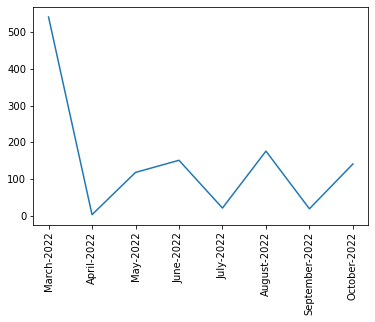

In [57]:
plt.plot(Time_line['time'],Time_line['message'])
plt.xticks(rotation = 90)
plt.show()

 ### Chats frequency per day

In [58]:
df['daily'] =df['Date'].dt.date

In [59]:
daily_timeline =df.groupby ('daily').count()['message'].reset_index()
daily_timeline

,daily,message
0,2022-03-01,13
1,2022-03-02,12
2,2022-03-03,19
3,2022-03-04,1
4,2022-03-05,2
...,...,...
68,2022-10-27,30
69,2022-10-28,15
70,2022-10-29,59
71,2022-10-30,6


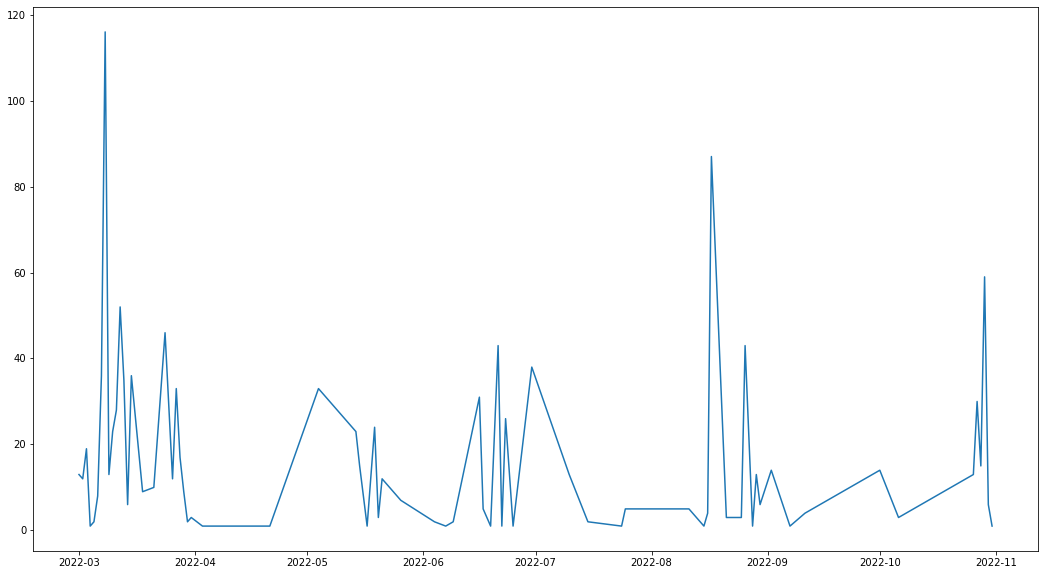

In [61]:
plt.figure(figsize= (18,10))
plt.plot(daily_timeline['daily'],daily_timeline['message']);

In [62]:
df['day_name'] = df['Date'].dt.day_name()

In [63]:
df['day_name'].value_counts()

Thursday     261
Tuesday      229
Saturday     177
Wednesday    167
Friday       121
Sunday       121
Monday        94
Name: day_name, dtype: int64

In [64]:
yeah =df.groupby ('day_name').count()['message'].reset_index()
yeah

,day_name,message
0,Friday,121
1,Monday,94
2,Saturday,177
3,Sunday,121
4,Thursday,261
5,Tuesday,229
6,Wednesday,167


In [65]:
# chatting krne ka waqt

period = []
for hour in df[['day_name','Hour']]['Hour']:
    if hour == 23:
        
        period.append(str(hour)+ "-"+str('00'))
    elif hour == 0:
        period.append(str('00')+ "-"+str(hour+1))                                 
                                         
    else: 
        period.append(str(hour)+ '-'+str(hour+1))
                                         
                                         
                                         

In [66]:
df['period'] = period

In [67]:
df.head(3)

,Date,user,message,Year,Month,day,Hour,Minute,month_num,daily,day_name,period
0,2022-03-01 17:40:00,Notification,Messages and calls are end-to-end encrypted. N...,2022,March,1,17,40,3,2022-03-01,Tuesday,17-18
1,2022-03-01 17:40:00,Sahir Jio,Free hona to call krna\n,2022,March,1,17,40,3,2022-03-01,Tuesday,17-18
2,2022-03-01 17:41:00,😈😈,Insha allah\n,2022,March,1,17,41,3,2022-03-01,Tuesday,17-18


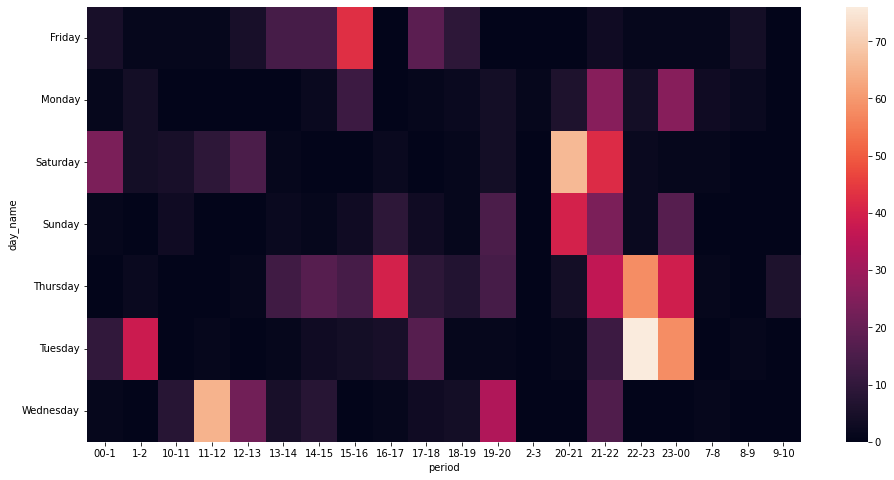

In [68]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.heatmap(df.pivot_table(index= 'day_name',columns = 'period', values= 'message',aggfunc ='count').fillna(0))
plt.yticks(rotation ='horizontal')
plt.show()